# Homework 1. Part 3.2

In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
from torch.utils.data import DataLoader

In [2]:
# Setting default device

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

display(f'{device} is available')

dtype = torch.float
torch.set_default_device(device)

'cuda is available'

### Modifiable model

In [3]:
class ChangeableNetwork(nn.Module):
    def __init__(self, modification=512):
        super().__init__()
        self.linear_relu = nn.Sequential(
            nn.Linear(28*28, modification),
            nn.ReLU(),
            nn.Linear(modification,modification),
            nn.ReLU(),
            nn.Linear(modification, 10),
        )

    def forward(self, x):
        flat = nn.Flatten()
        x = flat(x)
        logits = self.linear_relu(x)
        return logits

### Utility Functions

In [4]:
def cnt_model_params(model):
    """Count model parameters"""
    count = 0
    with torch.no_grad():
        for param in model.parameters():
            count+=param.numel()
    return count

def display_model_info(model_name, model):
    """ Display model information"""
    count = 0
    for module in model.modules():
        if isinstance(module, nn.Module):
            count+=1
    display(model)
    display(f"{model_name}. parameters: {cnt_model_params(model)}")

In [5]:
# Randomly changed the lavels on the training dataset. Kept labels the same on test dataset.
training_ds = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_ds = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())


### Training & eval loops

In [6]:
def nmist_train_loop(dataloader, model, loss_fn, optimize):
    model.train()
    num_batches = len(dataloader)
    train_loss, correct = 0,0
    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        optimize.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()

        loss.backward()
        optimize.step()
    
    train_loss /= num_batches
    correct /=size
    return train_loss, correct
        
def nmist_val_loop(dataloader, model, loss_fn):
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            X = X.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size
    return test_loss, correct

## Number of parameters vs generalization

In [7]:
# create models and with different Hidden values
models = [ChangeableNetwork(hidden*1024 + 5) for hidden in range(0,10)]
for idx, model in enumerate(models):
    display_model_info(idx, model)

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=10, bias=True)
  )
)

'0. parameters: 4015'

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=1029, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1029, out_features=1029, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1029, out_features=10, bias=True)
  )
)

'1. parameters: 1877935'

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=2053, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2053, out_features=2053, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2053, out_features=10, bias=True)
  )
)

'2. parameters: 5849007'

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=3077, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3077, out_features=3077, bias=True)
    (3): ReLU()
    (4): Linear(in_features=3077, out_features=10, bias=True)
  )
)

'3. parameters: 11917231'

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=4101, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4101, out_features=4101, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4101, out_features=10, bias=True)
  )
)

'4. parameters: 20082607'

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=5125, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5125, out_features=5125, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5125, out_features=10, bias=True)
  )
)

'5. parameters: 30345135'

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=6149, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6149, out_features=6149, bias=True)
    (3): ReLU()
    (4): Linear(in_features=6149, out_features=10, bias=True)
  )
)

'6. parameters: 42704815'

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=7173, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7173, out_features=7173, bias=True)
    (3): ReLU()
    (4): Linear(in_features=7173, out_features=10, bias=True)
  )
)

'7. parameters: 57161647'

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=8197, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8197, out_features=8197, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8197, out_features=10, bias=True)
  )
)

'8. parameters: 73715631'

ChangeableNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=784, out_features=9221, bias=True)
    (1): ReLU()
    (2): Linear(in_features=9221, out_features=9221, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9221, out_features=10, bias=True)
  )
)

'9. parameters: 92366767'

In [8]:
# hyperparameters
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 150
lr = 1e-3
batch_size=64

fit_df = pd.DataFrame()

# Dataloader
training_dl = DataLoader(training_ds, batch_size=batch_size)
test_dl = DataLoader(test_ds, batch_size=64)

for idx, model in enumerate(models):
    optimizer1 = torch.optim.SGD(model.parameters(), lr=lr)
    display("Training & eval: Model with random labels")
    for epoch in range(epochs):
        train_loss, t_correct = nmist_train_loop(training_dl, model, loss_fn, optimizer1)
        val_loss, v_correct = nmist_val_loop(test_dl, model, loss_fn)
        if epoch%10==0:
            display(f'Epoch {epoch}. Training_loss: {train_loss}. Val_loss: {val_loss}. Training_accuracy: {t_correct}. Val_accuracy: {v_correct}')
    display("Done")
    
    if fit_df.empty:
        fit_df = pd.DataFrame([[epoch, train_loss, val_loss, t_correct, v_correct, cnt_model_params(model)]], columns=['epoch','train_loss','val_loss', 'train_acc', 'v_acc','parameters'])
    else:
        columns=['epoch','train_loss','val_loss', 'train_acc', 'v_acc','parameters']
        fit_df = pd.concat([fit_df, pd.DataFrame([[epoch, train_loss, val_loss, t_correct, v_correct, cnt_model_params(model)]], columns=columns )])

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.3201843416258723. Val_loss: 2.3037536037955313. Training_accuracy: 0.11753333333333334. Val_accuracy: 0.1244'

'Epoch 10. Training_loss: 1.689005731900872. Val_loss: 1.6306966702649548. Training_accuracy: 0.3947. Val_accuracy: 0.4112'

'Epoch 20. Training_loss: 1.016351541921274. Val_loss: 0.9798135966252369. Training_accuracy: 0.6908166666666666. Val_accuracy: 0.6982'

'Epoch 30. Training_loss: 0.7784674839297338. Val_loss: 0.7577686772984304. Training_accuracy: 0.75675. Val_accuracy: 0.7671'

'Epoch 40. Training_loss: 0.6577204586918166. Val_loss: 0.6398670156100753. Training_accuracy: 0.8034. Val_accuracy: 0.8083'

'Epoch 50. Training_loss: 0.5976034931695537. Val_loss: 0.5836642587640483. Training_accuracy: 0.8241333333333334. Val_accuracy: 0.8275'

'Epoch 60. Training_loss: 0.564276040347019. Val_loss: 0.5529033380329229. Training_accuracy: 0.8349666666666666. Val_accuracy: 0.8375'

'Epoch 70. Training_loss: 0.5426847235496237. Val_loss: 0.5335030206449473. Training_accuracy: 0.84315. Val_accuracy: 0.8433'

'Epoch 80. Training_loss: 0.5276172668663169. Val_loss: 0.5202312733337378. Training_accuracy: 0.8477166666666667. Val_accuracy: 0.8492'

'Epoch 90. Training_loss: 0.5161549185813744. Val_loss: 0.5105989792259635. Training_accuracy: 0.8505833333333334. Val_accuracy: 0.8534'

'Epoch 100. Training_loss: 0.5071834015296594. Val_loss: 0.5031241688189233. Training_accuracy: 0.8533166666666666. Val_accuracy: 0.8546'

'Epoch 110. Training_loss: 0.4999211054684511. Val_loss: 0.49718049225533845. Training_accuracy: 0.8556166666666667. Val_accuracy: 0.8554'

'Epoch 120. Training_loss: 0.4939443305103001. Val_loss: 0.49241730044032356. Training_accuracy: 0.8575333333333334. Val_accuracy: 0.8569'

'Epoch 130. Training_loss: 0.4889385398628234. Val_loss: 0.4883272159061614. Training_accuracy: 0.85935. Val_accuracy: 0.8575'

'Epoch 140. Training_loss: 0.484535776555284. Val_loss: 0.4849183495826782. Training_accuracy: 0.8607333333333334. Val_accuracy: 0.8589'

'Done'

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.269655281292604. Val_loss: 2.233527557105775. Training_accuracy: 0.37011666666666665. Val_accuracy: 0.5622'

'Epoch 10. Training_loss: 0.5733773960614763. Val_loss: 0.5304839270319909. Training_accuracy: 0.8572833333333333. Val_accuracy: 0.8686'

'Epoch 20. Training_loss: 0.3801069425534147. Val_loss: 0.358282117588315. Training_accuracy: 0.8955166666666666. Val_accuracy: 0.9009'

'Epoch 30. Training_loss: 0.3268257181392486. Val_loss: 0.31026917481261074. Training_accuracy: 0.9076333333333333. Val_accuracy: 0.9107'

'Epoch 40. Training_loss: 0.29586120628948404. Val_loss: 0.28269929827968027. Training_accuracy: 0.9156333333333333. Val_accuracy: 0.9201'

'Epoch 50. Training_loss: 0.2724297037785019. Val_loss: 0.26200569876629837. Training_accuracy: 0.9222833333333333. Val_accuracy: 0.9262'

'Epoch 60. Training_loss: 0.2527412591831707. Val_loss: 0.24461748657427776. Training_accuracy: 0.9281333333333334. Val_accuracy: 0.931'

'Epoch 70. Training_loss: 0.23532951129540833. Val_loss: 0.22914407923105795. Training_accuracy: 0.9331166666666667. Val_accuracy: 0.9355'

'Epoch 80. Training_loss: 0.21965879522788245. Val_loss: 0.2151804678082751. Training_accuracy: 0.9377833333333333. Val_accuracy: 0.9388'

'Epoch 90. Training_loss: 0.20548258319016555. Val_loss: 0.2025114752880185. Training_accuracy: 0.94235. Val_accuracy: 0.9426'

'Epoch 100. Training_loss: 0.19263770699755214. Val_loss: 0.1910391660187702. Training_accuracy: 0.9457666666666666. Val_accuracy: 0.9442'

'Epoch 110. Training_loss: 0.18096410397336934. Val_loss: 0.18063134919840154. Training_accuracy: 0.9490666666666666. Val_accuracy: 0.9473'

'Epoch 120. Training_loss: 0.17033666651199525. Val_loss: 0.17116545358150723. Training_accuracy: 0.95195. Val_accuracy: 0.9496'

'Epoch 130. Training_loss: 0.16062422568149276. Val_loss: 0.16256571616117316. Training_accuracy: 0.9547666666666667. Val_accuracy: 0.9521'

'Epoch 140. Training_loss: 0.1517410527066842. Val_loss: 0.15476464102293847. Training_accuracy: 0.9575. Val_accuracy: 0.9543'

'Done'

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.2494014687121298. Val_loss: 2.187073265670971. Training_accuracy: 0.45763333333333334. Val_accuracy: 0.6267'

'Epoch 10. Training_loss: 0.5181741142736823. Val_loss: 0.48132834512336997. Training_accuracy: 0.8689. Val_accuracy: 0.8793'

'Epoch 20. Training_loss: 0.35988558575050283. Val_loss: 0.3411771638947687. Training_accuracy: 0.9001166666666667. Val_accuracy: 0.9039'

'Epoch 30. Training_loss: 0.309831104906542. Val_loss: 0.2962092436422968. Training_accuracy: 0.9117666666666666. Val_accuracy: 0.915'

'Epoch 40. Training_loss: 0.27938017283262473. Val_loss: 0.26893699966418516. Training_accuracy: 0.9207166666666666. Val_accuracy: 0.9235'

'Epoch 50. Training_loss: 0.2561326397161907. Val_loss: 0.24818840828148803. Training_accuracy: 0.92715. Val_accuracy: 0.9288'

'Epoch 60. Training_loss: 0.2366521039020532. Val_loss: 0.23079845455184483. Training_accuracy: 0.9327. Val_accuracy: 0.9348'

'Epoch 70. Training_loss: 0.21966255549738592. Val_loss: 0.21553861354566684. Training_accuracy: 0.9380333333333334. Val_accuracy: 0.9388'

'Epoch 80. Training_loss: 0.20451536413226554. Val_loss: 0.20185976842964057. Training_accuracy: 0.9420833333333334. Val_accuracy: 0.9422'

'Epoch 90. Training_loss: 0.1909469653651722. Val_loss: 0.1896064695783529. Training_accuracy: 0.94625. Val_accuracy: 0.9448'

'Epoch 100. Training_loss: 0.1787553122694066. Val_loss: 0.1786331132700916. Training_accuracy: 0.9496. Val_accuracy: 0.9479'

'Epoch 110. Training_loss: 0.16774719963267223. Val_loss: 0.16875242299524842. Training_accuracy: 0.9526666666666667. Val_accuracy: 0.9506'

'Epoch 120. Training_loss: 0.15776522366055992. Val_loss: 0.1598729068297703. Training_accuracy: 0.9555166666666667. Val_accuracy: 0.9534'

'Epoch 130. Training_loss: 0.1486842186599255. Val_loss: 0.15187967742591574. Training_accuracy: 0.9581. Val_accuracy: 0.9549'

'Epoch 140. Training_loss: 0.14039237079853967. Val_loss: 0.1446522266105719. Training_accuracy: 0.9602833333333334. Val_accuracy: 0.9567'

'Done'

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.224242266561431. Val_loss: 2.1373165731976744. Training_accuracy: 0.5082166666666666. Val_accuracy: 0.6963'

'Epoch 10. Training_loss: 0.47899282282031674. Val_loss: 0.44564167936896065. Training_accuracy: 0.87875. Val_accuracy: 0.8872'

'Epoch 20. Training_loss: 0.3466010182095108. Val_loss: 0.32809069107292566. Training_accuracy: 0.9035666666666666. Val_accuracy: 0.908'

'Epoch 30. Training_loss: 0.30098319601323176. Val_loss: 0.2873715090856051. Training_accuracy: 0.9146833333333333. Val_accuracy: 0.9186'

'Epoch 40. Training_loss: 0.27221311259665276. Val_loss: 0.2620163034576519. Training_accuracy: 0.9229333333333334. Val_accuracy: 0.926'

'Epoch 50. Training_loss: 0.2498572104548944. Val_loss: 0.24244713448699873. Training_accuracy: 0.9290666666666667. Val_accuracy: 0.9312'

'Epoch 60. Training_loss: 0.23091782056398866. Val_loss: 0.2258152869488498. Training_accuracy: 0.9344666666666667. Val_accuracy: 0.9356'

'Epoch 70. Training_loss: 0.21428584237533338. Val_loss: 0.21110990832138593. Training_accuracy: 0.9398166666666666. Val_accuracy: 0.9404'

'Epoch 80. Training_loss: 0.19945121447998546. Val_loss: 0.19794551865049417. Training_accuracy: 0.9438166666666666. Val_accuracy: 0.9432'

'Epoch 90. Training_loss: 0.186102496879076. Val_loss: 0.18608602681820086. Training_accuracy: 0.94785. Val_accuracy: 0.9455'

'Epoch 100. Training_loss: 0.17404482126343193. Val_loss: 0.17538078141452115. Training_accuracy: 0.9510666666666666. Val_accuracy: 0.9482'

'Epoch 110. Training_loss: 0.1631237115732817. Val_loss: 0.16574937187930106. Training_accuracy: 0.9542833333333334. Val_accuracy: 0.9517'

'Epoch 120. Training_loss: 0.1532034976328455. Val_loss: 0.1570737542121843. Training_accuracy: 0.95675. Val_accuracy: 0.9534'

'Epoch 130. Training_loss: 0.14417651696686648. Val_loss: 0.14925884954322866. Training_accuracy: 0.95945. Val_accuracy: 0.9561'

'Epoch 140. Training_loss: 0.13594278402185675. Val_loss: 0.14220621471981382. Training_accuracy: 0.9621666666666666. Val_accuracy: 0.9579'

'Done'

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.205673166683742. Val_loss: 2.0943722474347255. Training_accuracy: 0.5288666666666667. Val_accuracy: 0.7058'

'Epoch 10. Training_loss: 0.460767019142919. Val_loss: 0.42807651192519314. Training_accuracy: 0.8809333333333333. Val_accuracy: 0.8901'

'Epoch 20. Training_loss: 0.3380984204974192. Val_loss: 0.31953407701840447. Training_accuracy: 0.9045. Val_accuracy: 0.9112'

'Epoch 30. Training_loss: 0.29359740271830737. Val_loss: 0.2801092232274971. Training_accuracy: 0.9162666666666667. Val_accuracy: 0.9212'

'Epoch 40. Training_loss: 0.26521444284934986. Val_loss: 0.25530530879523156. Training_accuracy: 0.9252. Val_accuracy: 0.9277'

'Epoch 50. Training_loss: 0.24306831732074588. Val_loss: 0.23604170356396656. Training_accuracy: 0.9316666666666666. Val_accuracy: 0.9322'

'Epoch 60. Training_loss: 0.22429659445164427. Val_loss: 0.2196704047097332. Training_accuracy: 0.9369. Val_accuracy: 0.9379'

'Epoch 70. Training_loss: 0.2078095538430472. Val_loss: 0.20518279076215756. Training_accuracy: 0.9414666666666667. Val_accuracy: 0.9411'

'Epoch 80. Training_loss: 0.19309464702382684. Val_loss: 0.1921948337583405. Training_accuracy: 0.9457. Val_accuracy: 0.9443'

'Epoch 90. Training_loss: 0.17985650417464438. Val_loss: 0.18049455229726852. Training_accuracy: 0.9493333333333334. Val_accuracy: 0.9479'

'Epoch 100. Training_loss: 0.16793597319216996. Val_loss: 0.1699899544073328. Training_accuracy: 0.9527. Val_accuracy: 0.9502'

'Epoch 110. Training_loss: 0.15717203820199727. Val_loss: 0.16056789529575094. Training_accuracy: 0.9557333333333333. Val_accuracy: 0.9524'

'Epoch 120. Training_loss: 0.147429185657343. Val_loss: 0.15210604908799005. Training_accuracy: 0.9584. Val_accuracy: 0.9547'

'Epoch 130. Training_loss: 0.1385984574201336. Val_loss: 0.14450437494162113. Training_accuracy: 0.9612833333333334. Val_accuracy: 0.9572'

'Epoch 140. Training_loss: 0.1305605126321435. Val_loss: 0.13766078841813192. Training_accuracy: 0.9639833333333333. Val_accuracy: 0.9594'

'Done'

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.188802136668264. Val_loss: 2.054000918272954. Training_accuracy: 0.5491. Val_accuracy: 0.7185'

'Epoch 10. Training_loss: 0.4425069861241114. Val_loss: 0.4113038071686295. Training_accuracy: 0.8859. Val_accuracy: 0.8931'

'Epoch 20. Training_loss: 0.32959794821833244. Val_loss: 0.31166158866872834. Training_accuracy: 0.9075333333333333. Val_accuracy: 0.9118'

'Epoch 30. Training_loss: 0.286318605743857. Val_loss: 0.2735152400935152. Training_accuracy: 0.9192333333333333. Val_accuracy: 0.9231'

'Epoch 40. Training_loss: 0.25812722540605487. Val_loss: 0.24897439261767895. Training_accuracy: 0.9273166666666667. Val_accuracy: 0.9292'

'Epoch 50. Training_loss: 0.23601303822092856. Val_loss: 0.229762204056665. Training_accuracy: 0.93395. Val_accuracy: 0.9342'

'Epoch 60. Training_loss: 0.2173145632765917. Val_loss: 0.21343120808007232. Training_accuracy: 0.9391. Val_accuracy: 0.9393'

'Epoch 70. Training_loss: 0.2009918307170653. Val_loss: 0.19905740654119736. Training_accuracy: 0.9439833333333333. Val_accuracy: 0.9435'

'Epoch 80. Training_loss: 0.18651848169230323. Val_loss: 0.1862490763353884. Training_accuracy: 0.94805. Val_accuracy: 0.9463'

'Epoch 90. Training_loss: 0.17358525306768796. Val_loss: 0.17480998829149516. Training_accuracy: 0.9512166666666667. Val_accuracy: 0.9492'

'Epoch 100. Training_loss: 0.16197865597927558. Val_loss: 0.1645738772371677. Training_accuracy: 0.95435. Val_accuracy: 0.9521'

'Epoch 110. Training_loss: 0.1515286424542779. Val_loss: 0.1554045954520464. Training_accuracy: 0.9574333333333334. Val_accuracy: 0.9552'

'Epoch 120. Training_loss: 0.14208931493352472. Val_loss: 0.1471922588742273. Training_accuracy: 0.9601833333333334. Val_accuracy: 0.9575'

'Epoch 130. Training_loss: 0.13353306235127976. Val_loss: 0.13982475500340294. Training_accuracy: 0.9626833333333333. Val_accuracy: 0.9596'

'Epoch 140. Training_loss: 0.12574651610326648. Val_loss: 0.13319610615385472. Training_accuracy: 0.9649666666666666. Val_accuracy: 0.9613'

'Done'

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.162257185622827. Val_loss: 2.002467811487283. Training_accuracy: 0.5854166666666667. Val_accuracy: 0.7204'

'Epoch 10. Training_loss: 0.4289615953337155. Val_loss: 0.39929543810475404. Training_accuracy: 0.8881666666666667. Val_accuracy: 0.8947'

'Epoch 20. Training_loss: 0.32306114874923153. Val_loss: 0.3058113966398178. Training_accuracy: 0.9092333333333333. Val_accuracy: 0.9138'

'Epoch 30. Training_loss: 0.2810073751431983. Val_loss: 0.26869256572596206. Training_accuracy: 0.9203. Val_accuracy: 0.9242'

'Epoch 40. Training_loss: 0.253219596296946. Val_loss: 0.2444444787302974. Training_accuracy: 0.9285333333333333. Val_accuracy: 0.9306'

'Epoch 50. Training_loss: 0.2313690190888576. Val_loss: 0.22543709681837992. Training_accuracy: 0.9349833333333334. Val_accuracy: 0.9366'

'Epoch 60. Training_loss: 0.21291633662400342. Val_loss: 0.2093104665482025. Training_accuracy: 0.9402333333333334. Val_accuracy: 0.9409'

'Epoch 70. Training_loss: 0.1968175934861972. Val_loss: 0.19516194631956565. Training_accuracy: 0.9449666666666666. Val_accuracy: 0.9448'

'Epoch 80. Training_loss: 0.1825468600717689. Val_loss: 0.18261753661842767. Training_accuracy: 0.94895. Val_accuracy: 0.9482'

'Epoch 90. Training_loss: 0.16980834629561412. Val_loss: 0.1714449646603909. Training_accuracy: 0.95255. Val_accuracy: 0.9504'

'Epoch 100. Training_loss: 0.15838598952328822. Val_loss: 0.16149456596452813. Training_accuracy: 0.9555666666666667. Val_accuracy: 0.9528'

'Epoch 110. Training_loss: 0.14811076746254698. Val_loss: 0.15260983834630412. Training_accuracy: 0.9584. Val_accuracy: 0.9555'

'Epoch 120. Training_loss: 0.13883789594340792. Val_loss: 0.14468016929532976. Training_accuracy: 0.9611666666666666. Val_accuracy: 0.9576'

'Epoch 130. Training_loss: 0.13043706335310043. Val_loss: 0.13758365083100263. Training_accuracy: 0.9638. Val_accuracy: 0.9593'

'Epoch 140. Training_loss: 0.12279357071042553. Val_loss: 0.13119919660981674. Training_accuracy: 0.9662833333333334. Val_accuracy: 0.961'

'Done'

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.1446374978846325. Val_loss: 1.9648561227093837. Training_accuracy: 0.5597. Val_accuracy: 0.7442'

'Epoch 10. Training_loss: 0.41815482184831015. Val_loss: 0.3885001062065553. Training_accuracy: 0.8914166666666666. Val_accuracy: 0.8978'

'Epoch 20. Training_loss: 0.3173436034542284. Val_loss: 0.29968373370683116. Training_accuracy: 0.9105833333333333. Val_accuracy: 0.9161'

'Epoch 30. Training_loss: 0.2762720115792586. Val_loss: 0.2636730412472111. Training_accuracy: 0.9224. Val_accuracy: 0.9272'

'Epoch 40. Training_loss: 0.24883097067658008. Val_loss: 0.23990694910975968. Training_accuracy: 0.9302666666666667. Val_accuracy: 0.9333'

'Epoch 50. Training_loss: 0.2271768128288898. Val_loss: 0.22118414838199213. Training_accuracy: 0.93645. Val_accuracy: 0.9376'

'Epoch 60. Training_loss: 0.2088693227968427. Val_loss: 0.2052785305567323. Training_accuracy: 0.9418666666666666. Val_accuracy: 0.9416'

'Epoch 70. Training_loss: 0.1929076361898849. Val_loss: 0.19133844629677524. Training_accuracy: 0.9466333333333333. Val_accuracy: 0.9453'

'Epoch 80. Training_loss: 0.17877044606366074. Val_loss: 0.17897730701822478. Training_accuracy: 0.9499. Val_accuracy: 0.9487'

'Epoch 90. Training_loss: 0.16616578545790714. Val_loss: 0.16798599201675718. Training_accuracy: 0.9538833333333333. Val_accuracy: 0.9517'

'Epoch 100. Training_loss: 0.15487348092700054. Val_loss: 0.15819447807475306. Training_accuracy: 0.9568. Val_accuracy: 0.9535'

'Epoch 110. Training_loss: 0.14471116268149475. Val_loss: 0.1494563336745142. Training_accuracy: 0.9597333333333333. Val_accuracy: 0.9565'

'Epoch 120. Training_loss: 0.13553893703447062. Val_loss: 0.1416591722147456. Training_accuracy: 0.96275. Val_accuracy: 0.9585'

'Epoch 130. Training_loss: 0.12723192185320373. Val_loss: 0.13467944623860917. Training_accuracy: 0.9649833333333333. Val_accuracy: 0.9603'

'Epoch 140. Training_loss: 0.1196801664738624. Val_loss: 0.12841528324279816. Training_accuracy: 0.9673833333333334. Val_accuracy: 0.9624'

'Done'

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.120668170167439. Val_loss: 1.912616013721296. Training_accuracy: 0.5761166666666667. Val_accuracy: 0.7491'

'Epoch 10. Training_loss: 0.4104341613188354. Val_loss: 0.38183740554911316. Training_accuracy: 0.8917. Val_accuracy: 0.8998'

'Epoch 20. Training_loss: 0.3130263244427407. Val_loss: 0.2961961811254169. Training_accuracy: 0.9118666666666667. Val_accuracy: 0.918'

'Epoch 30. Training_loss: 0.2719208571587258. Val_loss: 0.26041433584111134. Training_accuracy: 0.92285. Val_accuracy: 0.9276'

'Epoch 40. Training_loss: 0.2443131675034253. Val_loss: 0.23668184998640968. Training_accuracy: 0.9313833333333333. Val_accuracy: 0.9338'

'Epoch 50. Training_loss: 0.2225919389632592. Val_loss: 0.21799159278369443. Training_accuracy: 0.9378666666666666. Val_accuracy: 0.9382'

'Epoch 60. Training_loss: 0.20431848207929496. Val_loss: 0.20216900431758658. Training_accuracy: 0.9430833333333334. Val_accuracy: 0.9422'

'Epoch 70. Training_loss: 0.1884735341219585. Val_loss: 0.18838366188678393. Training_accuracy: 0.9472833333333334. Val_accuracy: 0.9456'

'Epoch 80. Training_loss: 0.17451579195421452. Val_loss: 0.17622040665061894. Training_accuracy: 0.9512. Val_accuracy: 0.9491'

'Epoch 90. Training_loss: 0.16212647945097863. Val_loss: 0.16544349822008117. Training_accuracy: 0.9550166666666666. Val_accuracy: 0.952'

'Epoch 100. Training_loss: 0.1510692745395529. Val_loss: 0.15587806977201135. Training_accuracy: 0.9580166666666666. Val_accuracy: 0.9546'

'Epoch 110. Training_loss: 0.14116955018475222. Val_loss: 0.14739028850991492. Training_accuracy: 0.9605166666666667. Val_accuracy: 0.9567'

'Epoch 120. Training_loss: 0.13225918118236288. Val_loss: 0.13982526274030185. Training_accuracy: 0.9633166666666667. Val_accuracy: 0.9586'

'Epoch 130. Training_loss: 0.12420039763972004. Val_loss: 0.1330618587467867. Training_accuracy: 0.96595. Val_accuracy: 0.9603'

'Epoch 140. Training_loss: 0.11687569777572603. Val_loss: 0.12699425216782007. Training_accuracy: 0.9679666666666666. Val_accuracy: 0.9623'

'Done'

'Training & eval: Model with random labels'

'Epoch 0. Training_loss: 2.098057612554351. Val_loss: 1.8700352345302607. Training_accuracy: 0.65565. Val_accuracy: 0.7623'

'Epoch 10. Training_loss: 0.4013090990801483. Val_loss: 0.3728301970015286. Training_accuracy: 0.89375. Val_accuracy: 0.8995'

'Epoch 20. Training_loss: 0.3078759370693393. Val_loss: 0.29107597355202885. Training_accuracy: 0.9133833333333333. Val_accuracy: 0.9192'

'Epoch 30. Training_loss: 0.26770872532971884. Val_loss: 0.25627931394276154. Training_accuracy: 0.9243833333333333. Val_accuracy: 0.9284'

'Epoch 40. Training_loss: 0.2405299699819609. Val_loss: 0.23299811228184372. Training_accuracy: 0.9326833333333333. Val_accuracy: 0.9341'

'Epoch 50. Training_loss: 0.21902807681624697. Val_loss: 0.21454397115595403. Training_accuracy: 0.9389666666666666. Val_accuracy: 0.9397'

'Epoch 60. Training_loss: 0.20088449494440608. Val_loss: 0.19886134688855167. Training_accuracy: 0.9438666666666666. Val_accuracy: 0.944'

'Epoch 70. Training_loss: 0.18512661771169667. Val_loss: 0.18515719573019415. Training_accuracy: 0.9483333333333334. Val_accuracy: 0.9475'

'Epoch 80. Training_loss: 0.17124039550492567. Val_loss: 0.17306166182266206. Training_accuracy: 0.9524166666666667. Val_accuracy: 0.9501'

'Epoch 90. Training_loss: 0.15892185066649908. Val_loss: 0.162356141563149. Training_accuracy: 0.95575. Val_accuracy: 0.9522'

'Epoch 100. Training_loss: 0.14793759548633512. Val_loss: 0.15286736940419313. Training_accuracy: 0.9584833333333334. Val_accuracy: 0.9549'

'Epoch 110. Training_loss: 0.13809903385216937. Val_loss: 0.1444428578140748. Training_accuracy: 0.9617666666666667. Val_accuracy: 0.9576'

'Epoch 120. Training_loss: 0.12925357006784124. Val_loss: 0.13694716573271687. Training_accuracy: 0.9642666666666667. Val_accuracy: 0.9596'

'Epoch 130. Training_loss: 0.12126409277709117. Val_loss: 0.1302636336834781. Training_accuracy: 0.9667. Val_accuracy: 0.9617'

'Epoch 140. Training_loss: 0.11401335976229532. Val_loss: 0.12428685298758992. Training_accuracy: 0.9688833333333333. Val_accuracy: 0.9633'

'Done'

Text(0.5, 1.0, 'accuracy')

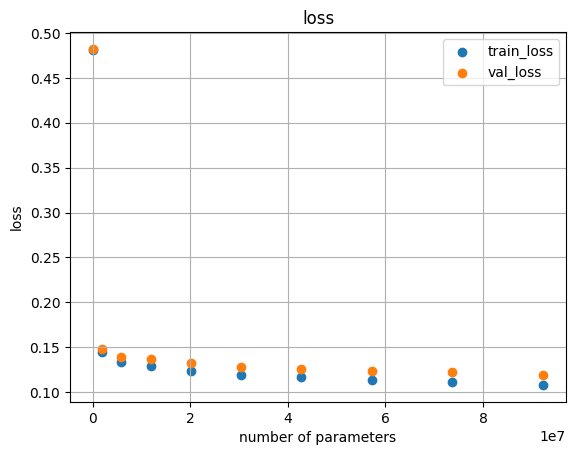

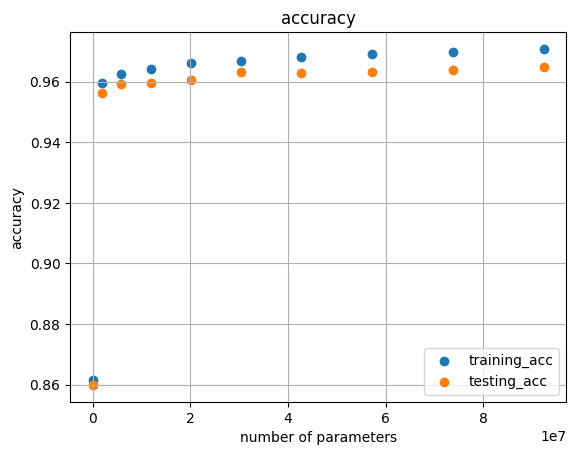

In [9]:
# 'train_loss','val_loss', 'train_acc', 'v_acc','parameters

fig, ax = plt.subplots()
ax.scatter(fit_df.parameters, fit_df.train_loss, label='train_loss')
ax.scatter(fit_df.parameters, fit_df.val_loss, label='val_loss')
ax.legend()
ax.set_xlabel('number of parameters')
ax.set_ylabel('loss')
ax.grid(True)
plt.title('loss')

fig2, ax2 = plt.subplots()
ax2.scatter(fit_df.parameters, fit_df.train_acc, label='training_acc')
ax2.scatter(fit_df.parameters, fit_df.v_acc, label='testing_acc')
ax2.legend()
ax2.set_xlabel('number of parameters')
ax2.set_ylabel('accuracy')
ax2.grid(True)
plt.title('accuracy')
